In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output

# 读取近三年的数据

In [2]:
terror=pd.read_excel('./data/basedata.xlsx',encoding='ISO-8859-1')
terror.rename(columns={'eventid':'Id','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Id','Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
level=pd.read_csv('./data/level.csv',encoding='ISO-8859-1')
terror['casualities']=terror['Killed']+terror['Wounded']
terror=pd.concat([terror,level],axis=1)
terror = terror.loc[terror['Year']>=2015]
terror.head(3)

,Id,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,...,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities,final_score,level
73687,201412030034,2015,1,3,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,...,5.0,Minibus,01/03/2015: An explosive device planted on a m...,Unknown,Private Citizens & Property,Explosives,NaN,7.0,2.321800,3
74378,201412220095,2015,1,1,Bosnia-Herzegovina,Eastern Europe,Trnovi,45.183961,15.828342,Armed Assault,...,1.0,Imam: Selvedin Beganovic,01/01/2015: Assailants stabbed Selvedin Begano...,Muslim extremists,Religious Figures/Institutions,Melee,"The specific motive is unknown; however, sourc...",1.0,1.196806,2
74730,201501010001,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,...,1.0,Lecturer,01/01/2015: An explosive device planted in a v...,Unknown,Educational Institution,Explosives,NaN,2.0,2.144564,3


# 1.主要原因分析

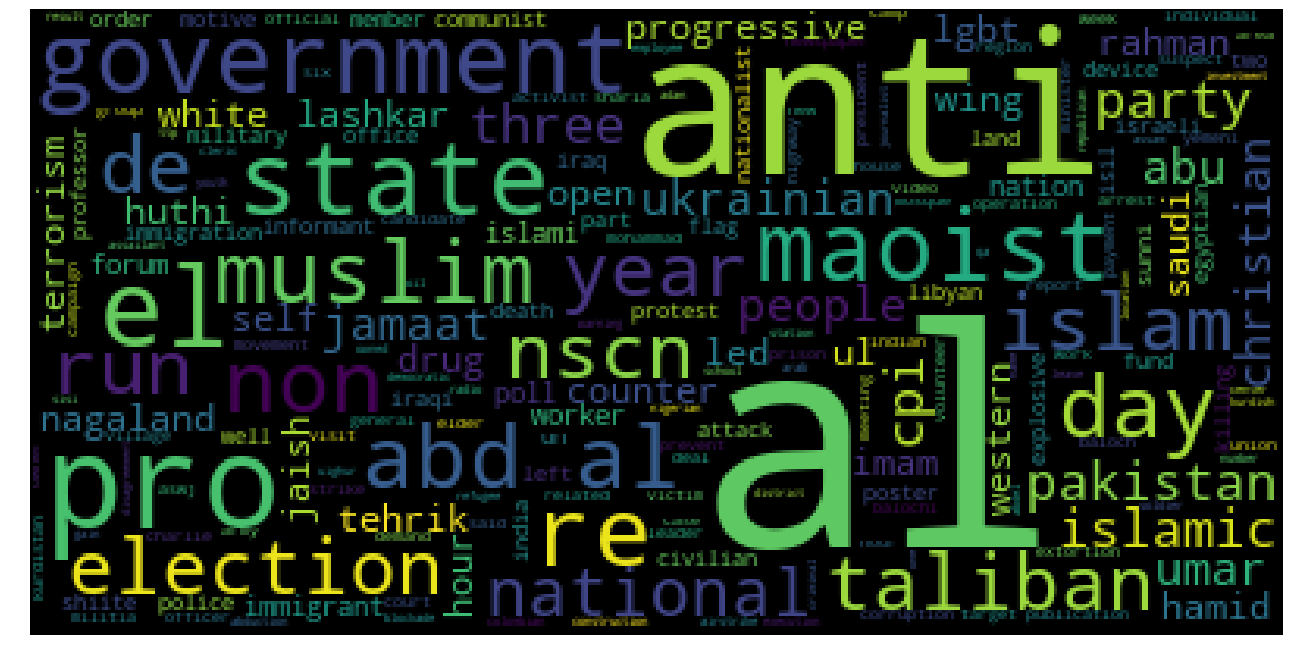

In [8]:
import nltk
from wordcloud import WordCloud, STOPWORDS
motive=terror['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.axis('off')
plt.show()

# 2.时空特性

### 统计历年恐怖袭击次数

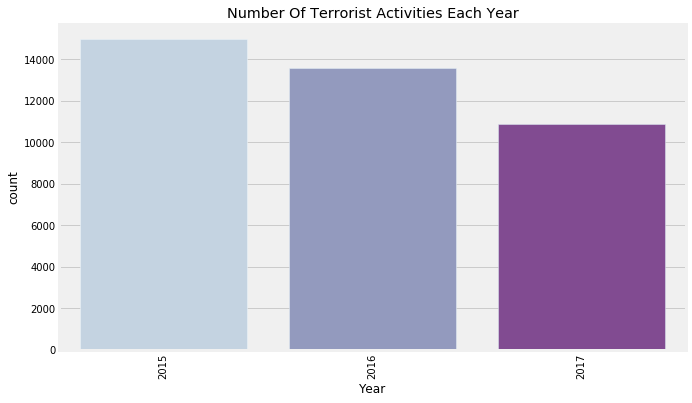

In [16]:
plt.subplots(figsize=(10,6))
sns.countplot('Year',data=terror,palette='BuPu',edgecolor=sns.color_palette('BuPu',20))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

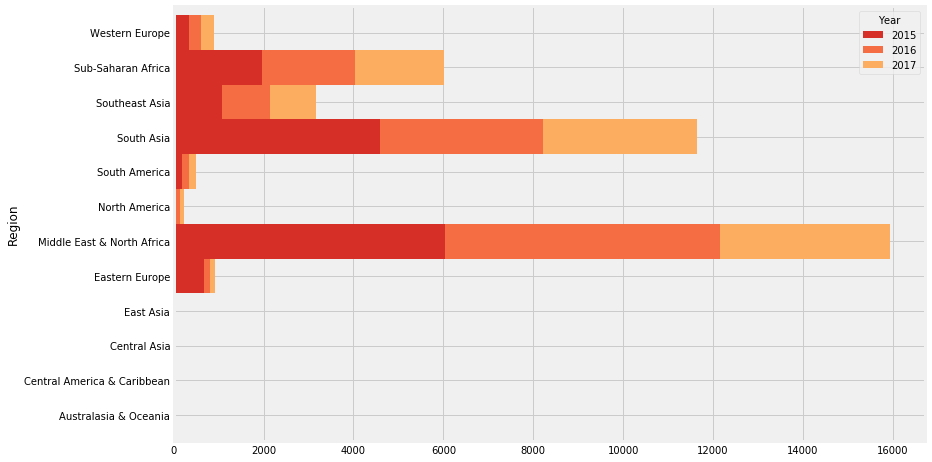

In [58]:
pd.crosstab(terror.Region,terror.Year).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

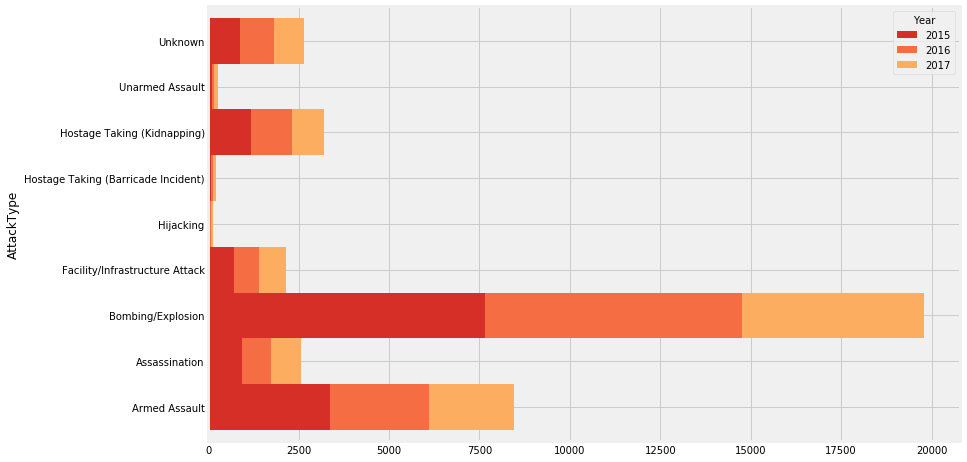

In [3]:
pd.crosstab(terror.AttackType,terror.Year).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

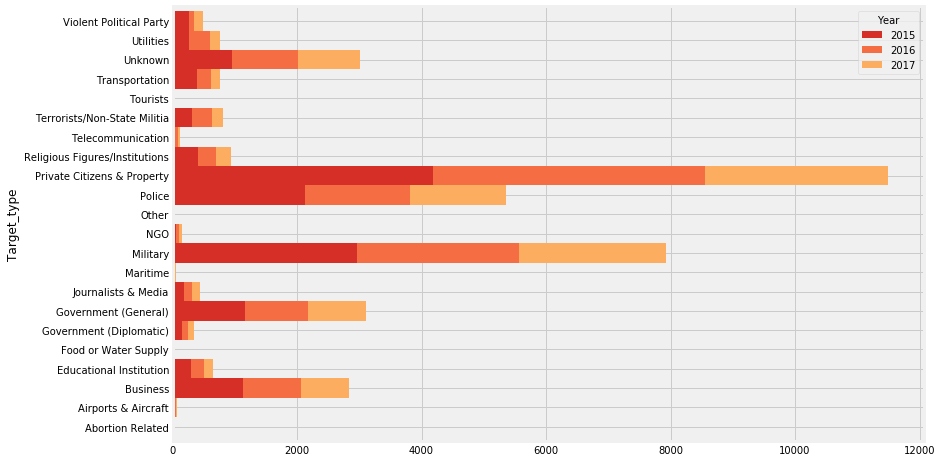

In [5]:
pd.crosstab(terror.Target_type,terror.Year).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

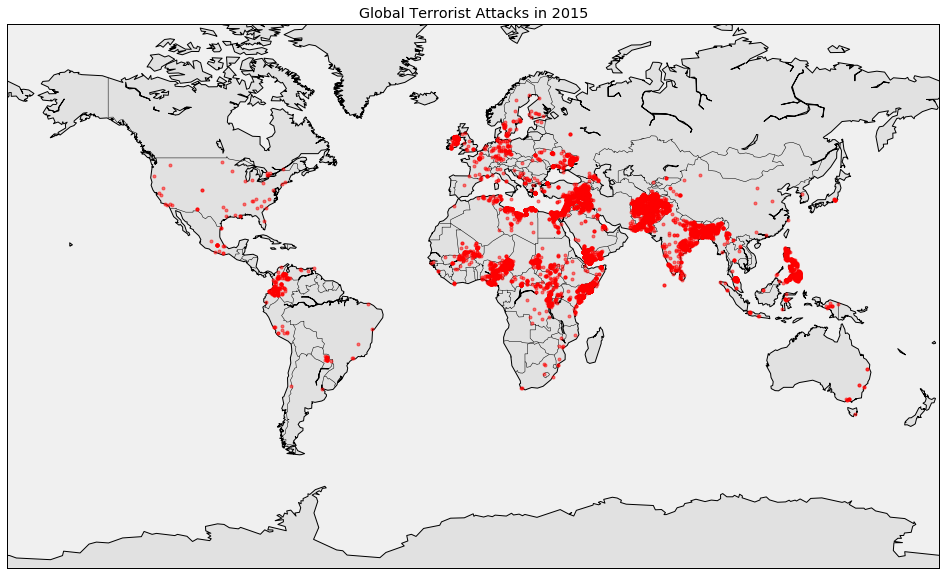

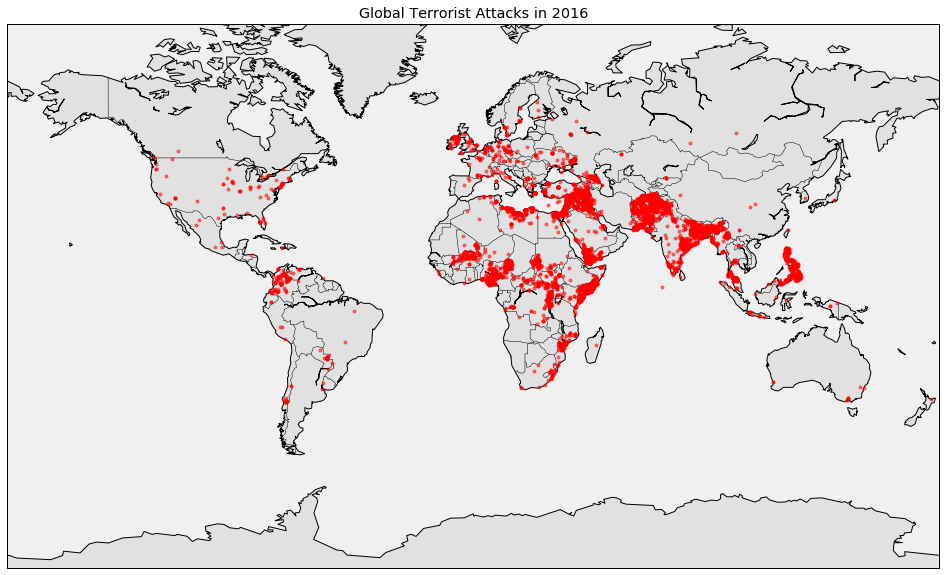

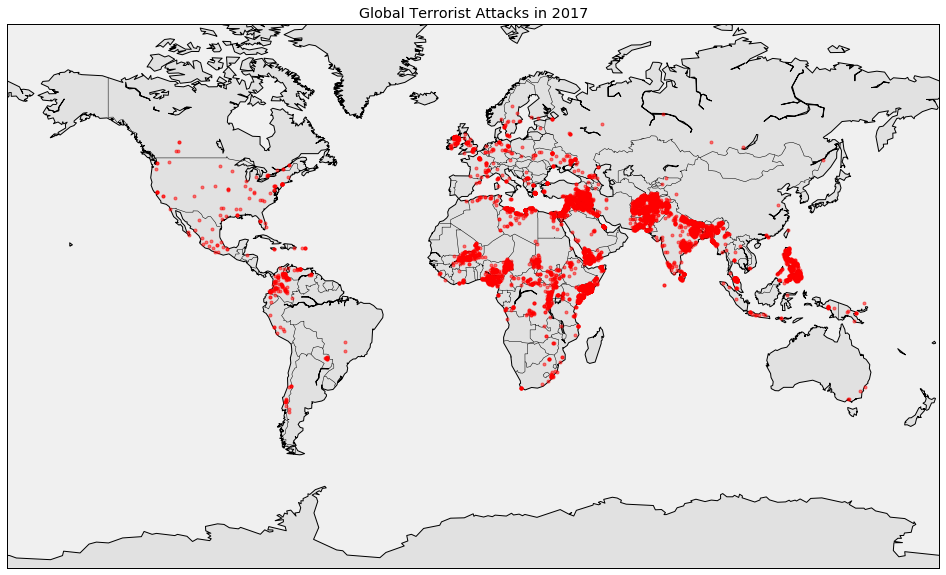

In [35]:
attack_Year = terror.loc[terror['Year']==2015]
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(attack_Year.latitude)
long_100=list(attack_Year.longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',color ='r',ms=3,alpha=0.5) 
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(zorder = 1,alpha=0.4)
m3.drawmapboundary()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Global Terrorist Attacks in 2015')
plt.show()

attack_Year = terror.loc[terror['Year']==2016]
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(attack_Year.latitude)
long_100=list(attack_Year.longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',color ='r',ms=3,alpha=0.5) 
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(zorder = 1,alpha=0.4)
m3.drawmapboundary()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Global Terrorist Attacks in 2016')
plt.show()

attack_Year = terror.loc[terror['Year']==2017]
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(attack_Year.latitude)
long_100=list(attack_Year.longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',color ='r',ms=3,alpha=0.5) 
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(zorder = 1,alpha=0.4)
m3.drawmapboundary()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Global Terrorist Attacks in 2017')
plt.show()

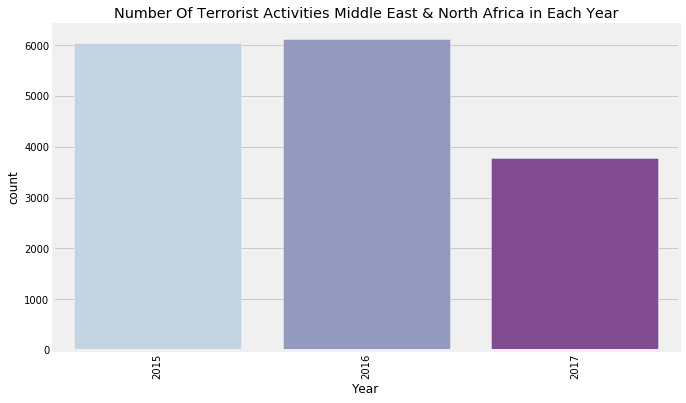

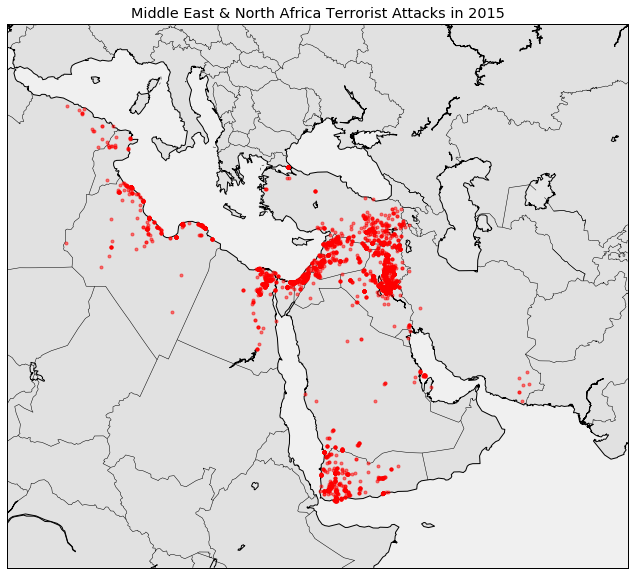

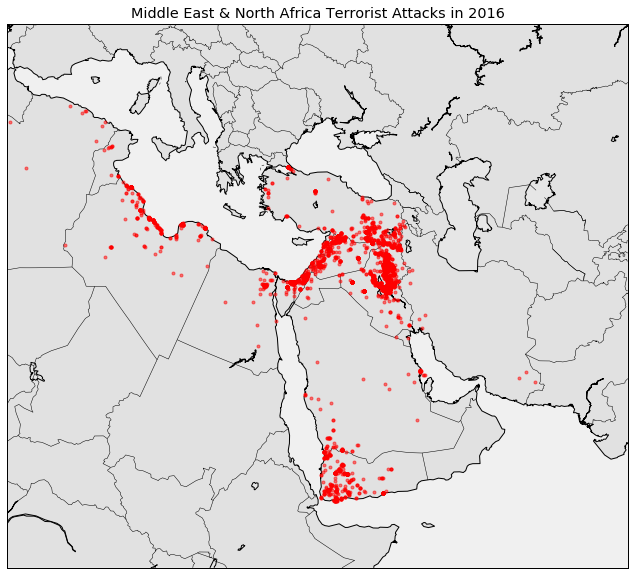

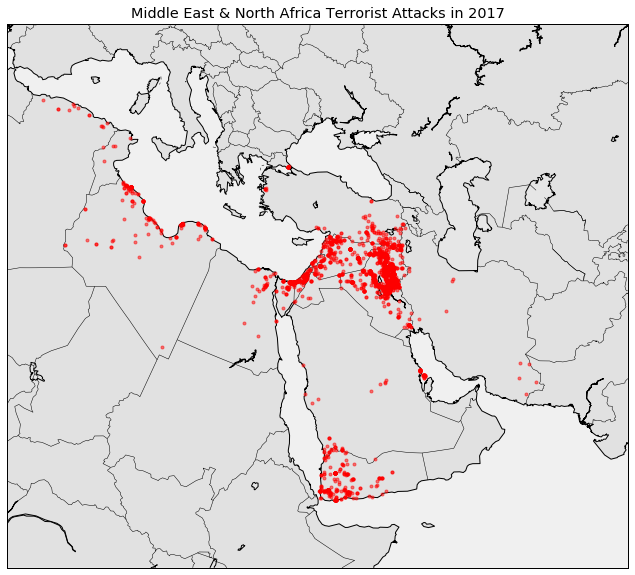

In [55]:
plt.subplots(figsize=(10,6))
sns.countplot('Year',data=terror.loc[terror['Region']=='Middle East & North Africa'],palette='BuPu',edgecolor=sns.color_palette('BuPu',20))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa in Each Year')
plt.show()

attack_country = terror.loc[terror['Region']=='Middle East & North Africa'].loc[terror['Year']==2015]
m3 = Basemap(projection='lcc',resolution='l',llcrnrlon=20,llcrnrlat=-3,urcrnrlon=70,urcrnrlat=60,lat_0=28,lon_0=77)
lat_100=list(attack_country.latitude)
long_100=list(attack_country.longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',color ='r',ms=3,alpha=0.5) 
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(zorder = 1,alpha=0.4)
m3.drawmapboundary()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Middle East & North Africa Terrorist Attacks in 2015')
plt.show()

attack_country = terror.loc[terror['Region']=='Middle East & North Africa'].loc[terror['Year']==2016]
m3 = Basemap(projection='lcc',resolution='l',llcrnrlon=20,llcrnrlat=-3,urcrnrlon=70,urcrnrlat=60,lat_0=28,lon_0=77)
lat_100=list(attack_country.latitude)
long_100=list(attack_country.longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',color ='r',ms=3,alpha=0.5) 
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(zorder = 1,alpha=0.4)
m3.drawmapboundary()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Middle East & North Africa Terrorist Attacks in 2016')
plt.show()

attack_country = terror.loc[terror['Region']=='Middle East & North Africa'].loc[terror['Year']==2017]
m3 = Basemap(projection='lcc',resolution='l',llcrnrlon=20,llcrnrlat=-3,urcrnrlon=70,urcrnrlat=60,lat_0=28,lon_0=77)
lat_100=list(attack_country.latitude)
long_100=list(attack_country.longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',color ='r',ms=3,alpha=0.5) 
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(zorder = 1,alpha=0.4)
m3.drawmapboundary()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Middle East & North Africa Terrorist Attacks in 2017')
plt.show()

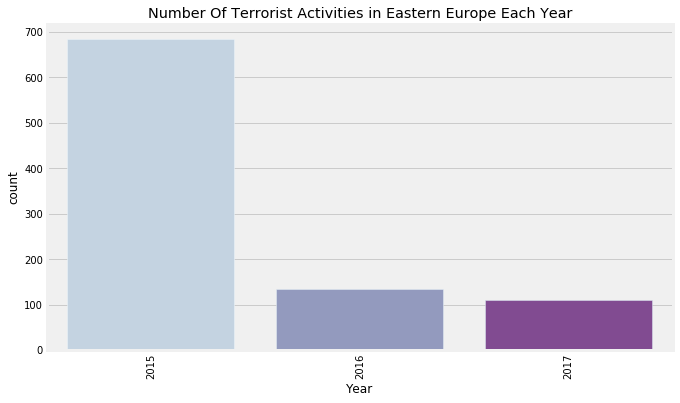

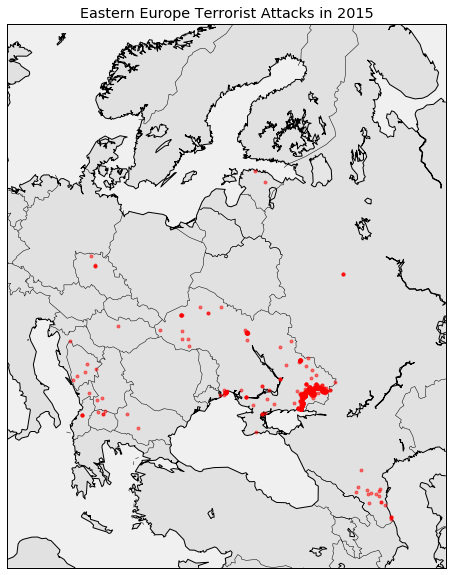

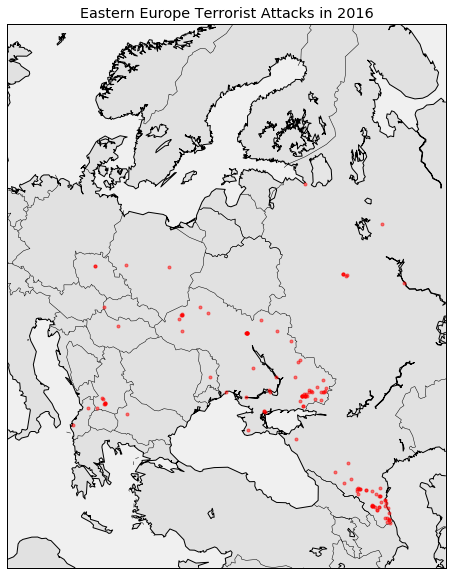

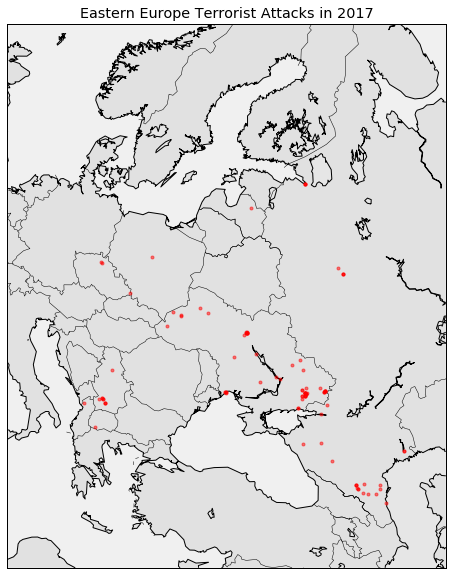

In [70]:
plt.subplots(figsize=(10,6))
sns.countplot('Year',data=terror.loc[terror['Region']=='Eastern Europe'],palette='BuPu',edgecolor=sns.color_palette('BuPu',20))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in Eastern Europe Each Year')
plt.show()

attack_country = terror.loc[terror['Region']=='Eastern Europe'].loc[terror['Year']==2015]
m3 = Basemap(projection='lcc',resolution='l',llcrnrlon=20,llcrnrlat=30,urcrnrlon=40,urcrnrlat=70,lat_0=28,lon_0=77)
lat_100=list(attack_country.latitude)
long_100=list(attack_country.longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',color ='r',ms=3,alpha=0.5) 
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(zorder = 1,alpha=0.4)
m3.drawmapboundary()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Eastern Europe Terrorist Attacks in 2015')
plt.show()

attack_country = terror.loc[terror['Region']=='Eastern Europe'].loc[terror['Year']==2016]
m3 = Basemap(projection='lcc',resolution='l',llcrnrlon=20,llcrnrlat=30,urcrnrlon=40,urcrnrlat=70,lat_0=28,lon_0=77)
lat_100=list(attack_country.latitude)
long_100=list(attack_country.longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',color ='r',ms=3,alpha=0.5) 
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(zorder = 1,alpha=0.4)
m3.drawmapboundary()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Eastern Europe Terrorist Attacks in 2016')
plt.show()

attack_country = terror.loc[terror['Region']=='Eastern Europe'].loc[terror['Year']==2017]
m3 = Basemap(projection='lcc',resolution='l',llcrnrlon=20,llcrnrlat=30,urcrnrlon=40,urcrnrlat=70,lat_0=28,lon_0=77)
lat_100=list(attack_country.latitude)
long_100=list(attack_country.longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',color ='r',ms=3,alpha=0.5) 
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(zorder = 1,alpha=0.4)
m3.drawmapboundary()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Eastern Europe Terrorist Attacks in 2017')
plt.show()

# 3.蔓延特性

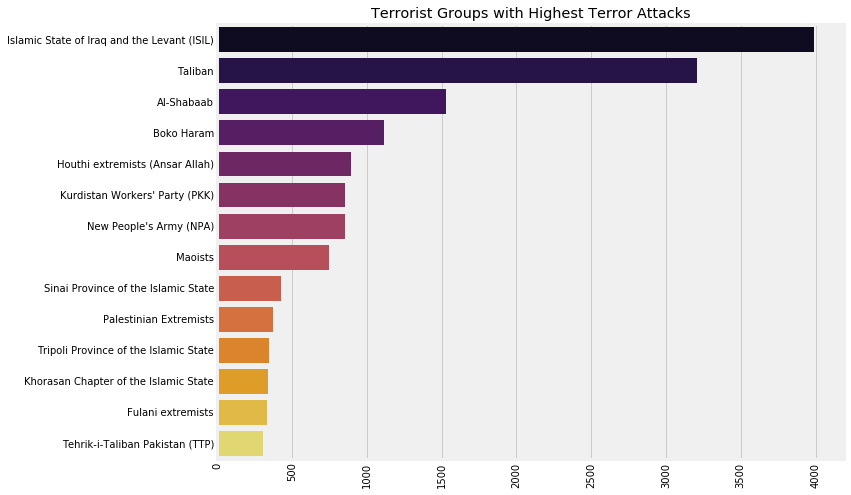

In [72]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

In [74]:
Group_data = pd.concat([terror.loc[terror['Group']=='Islamic State of Iraq and the Levant (ISIL)'],terror.loc[terror['Group']=='Taliban'],terror.loc[terror['Group']=='Al-Shabaab'],terror.loc[terror['Group']=='Boko Haram'],terror.loc[terror['Group']=='Houthi extremists (Ansar Allah)']])

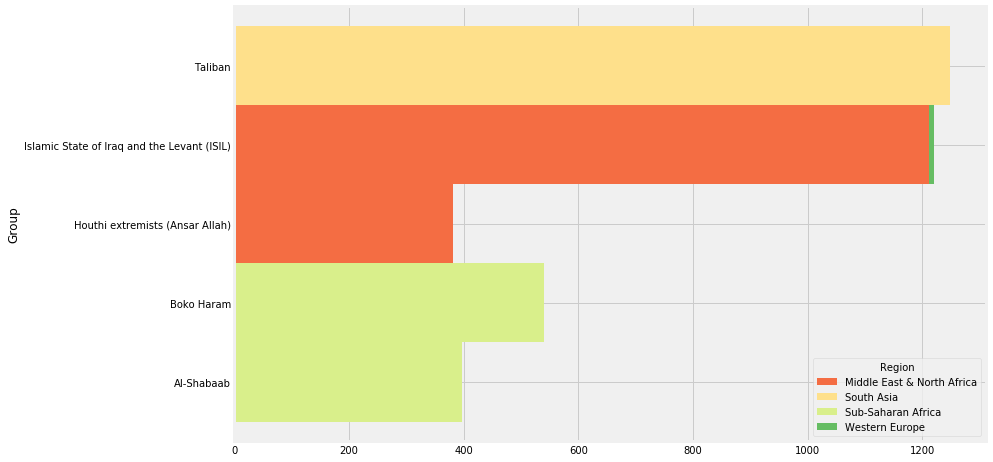

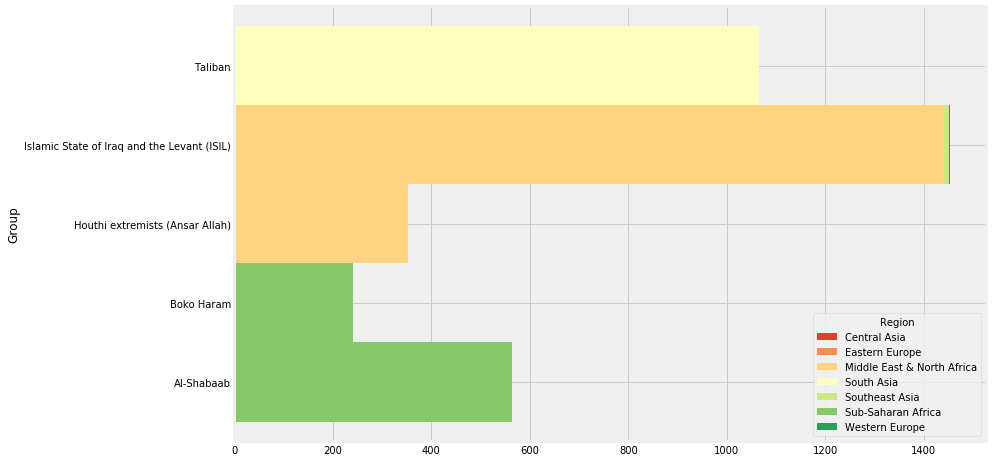

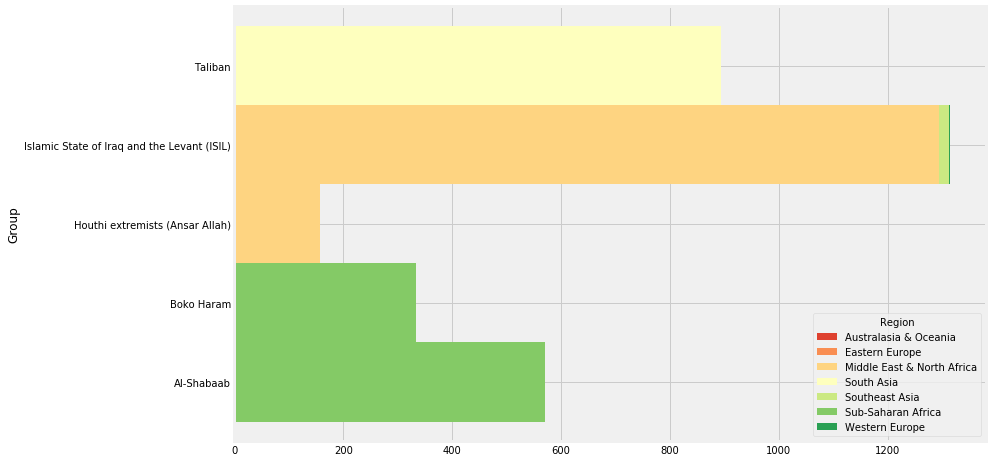

In [82]:
Group_data_year = Group_data.loc[Group_data['Year']==2015]
pd.crosstab(Group_data_year.Group,Group_data_year.Region).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',4))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Group_data_year = Group_data.loc[Group_data['Year']==2016]
pd.crosstab(Group_data_year.Group,Group_data_year.Region).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',7))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Group_data_year = Group_data.loc[Group_data['Year']==2017]
pd.crosstab(Group_data_year.Group,Group_data_year.Region).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',7))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

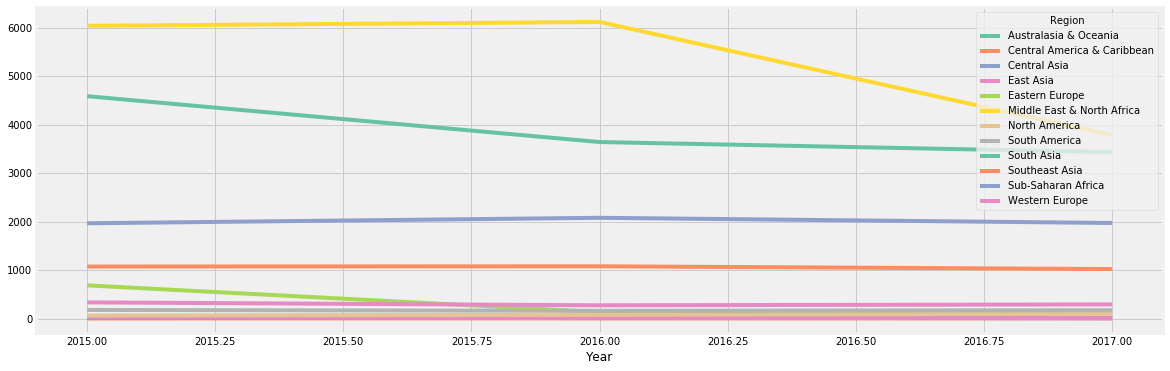

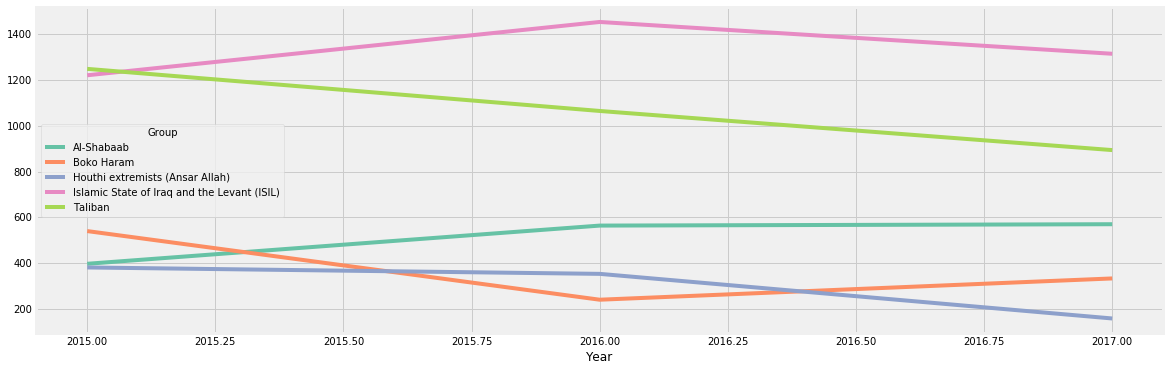

In [86]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

terror_region=pd.crosstab(Group_data.Year,Group_data.Group)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# 4.级别分布

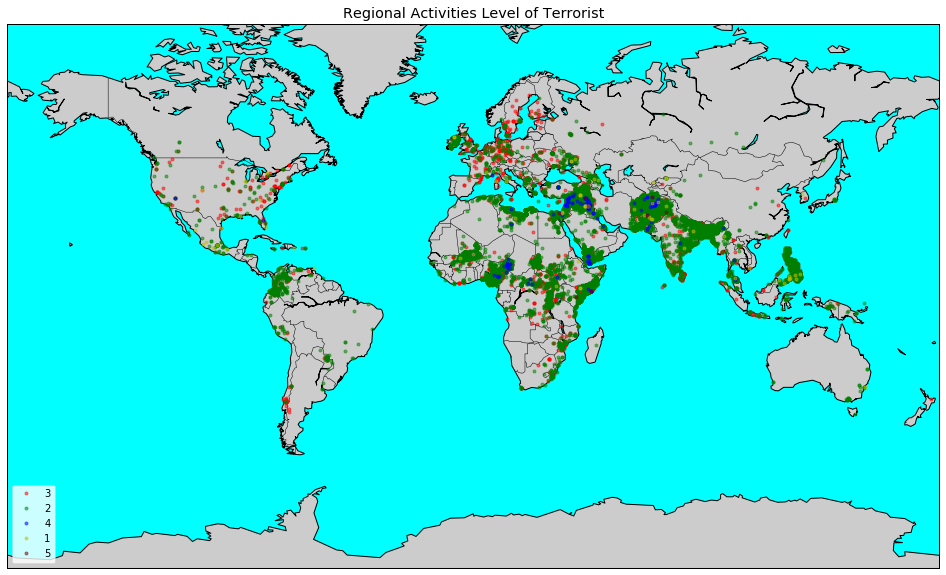

In [3]:
top_groups=terror[terror['level'].isin(terror['level'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='aqua')
m4.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['level'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['level']==group].latitude)
    long_group=list(top_groups[top_groups['level']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i,alpha=0.5)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities Level of Terrorist')
plt.show()

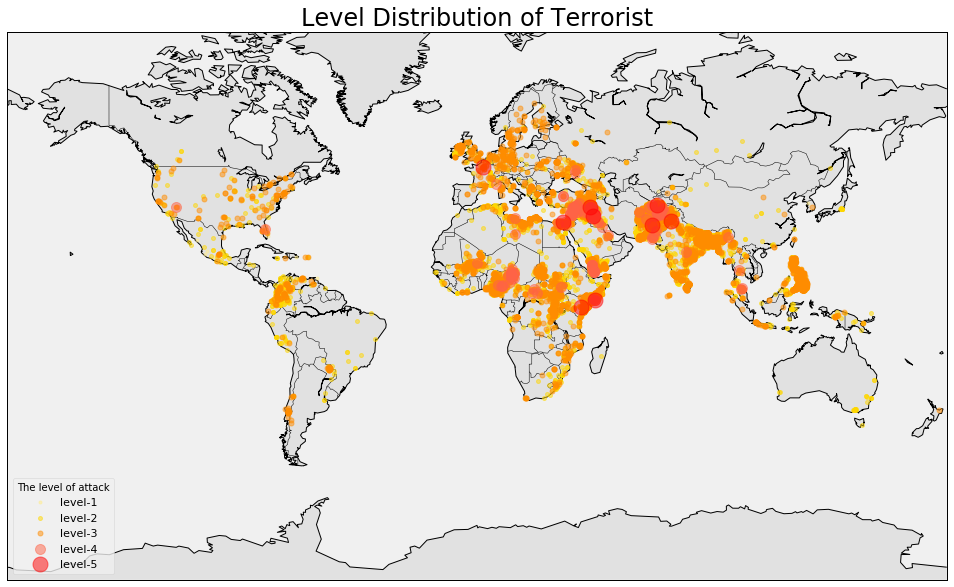

In [19]:
orange_palette = ((3, 1, '#FFEC8B', 'level-1'), (4, 2, '#FFD700', 'level-2'), \
                   (5, 3, '#FF8C00', 'level-3'), (10, 4, '#FF6347', 'level-4'), \
                  (15, 5, '#FF0000', 'level-5')) #marker size, count size, color
plt.figure(figsize=(15,15))
# Rounds the long- and latitude to a number withouth decimals, groups them on long- and latitude and counts the amount of attacks.
df_coords = terror[terror['level'].isin(terror['level'].value_counts()[:14].index)][['latitude','longitude','level']]
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(zorder = 1,alpha=0.4)
m.drawmapboundary()
    
def plot_points(marker_size, count_size, colour, label_count):
    x, y = m(list(df_coords.longitude[df_coords['level'] == count_size]),\
                (list(df_coords.latitude[df_coords['level'] == count_size])))
    points = m.plot(x, y, "o", markersize = marker_size, color = colour, label = label_count, alpha = .5)

for p in orange_palette:
    plot_points(p[0], p[1], p[2], p[3]) 
    
plt.title("Level Distribution of Terrorist", fontsize=24)
plt.legend(title= 'The level of attack', loc ='lower left', prop= {'size':11})
plt.show()